1. **Model Selection**:
   - I selected a diverse set of regression models including Support Vector Machine (SVM), Random Forest, Gradient Boosting, Naive Bayesian, Decision Tree, XGBoost and LSTM. This variety ensures a robust evaluation of different algorithmic approaches under similar conditions.

2. **Evaluation Metrics**:
   - The models were evaluated using several metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared. These metrics provide a comprehensive view of each model's performance, covering aspects of error magnitude and predictive accuracy.

3. **Results Summary**:
   - The results are presented in a table, sorted by Mean Squared Error. Gradient Boosting Regression performed the best with the lowest MSE and high R-squared value, indicating strong predictive power with less error and high variance explanation. This is followed by Random Forest and XGBoost, which also show good performance but with slightly higher errors.
   - At the other end, SVM and Naive Bayesian Regression exhibited the poorest performance with the highest errors and lowest R-squared values, indicating less suitability for this particular prediction task.

4. **Insights and Implications**:
   - The superior performance of tree-based models (Gradient Boosting, Random Forest, and XGBoost) suggests that these models handle the complexities and non-linear relationships in the dataset effectively.
   - The poor performance of SVM and Naive Bayesian might be due to their underlying assumptions (like data distribution for Naive Bayes and margin optimization in SVM) which may not align well with the structure of MY data.


SVM Mean Squared Error: 9349602.67115713
SVM Root Mean Squared Error: 3057.7119993807673
SVM Mean Absolute Error: 2140.5821715059847
SVM R-squared: 0.15861615317163824


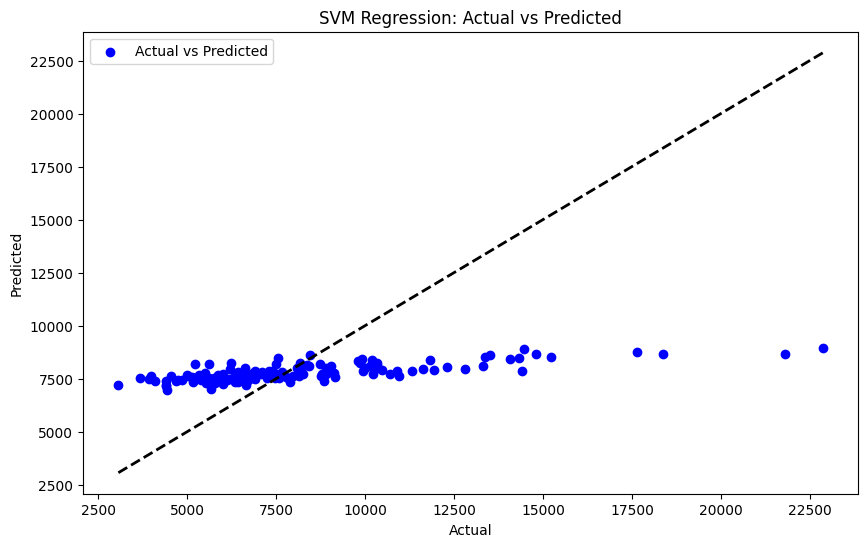

In [32]:
'''SVM'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Load data
data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')

# 2. Check for missing values and handle them
if data.isnull().values.any():
    # Print the number of missing values per column
    print("Missing values in each column:\n", data.isnull().sum())
    
    # Option 1: Fill missing values with the median of the column
    data.fillna(data.median(), inplace=True)

    # Option 2: Remove rows with missing values (comment out if using Option 1)
    # data.dropna(inplace=True)

# 3. No need to encode categories as they are already in numeric form

# 4. Separate features and the target variable
X = data.drop('Salary', axis=1)
y = data['Salary']

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train the model using Support Vector Regression
svm_model = SVR(kernel='linear')  # Using a linear kernel
svm_model.fit(X_train_scaled, y_train)

# 8. Evaluate the SVM regression model
svm_y_pred = svm_model.predict(X_test_scaled)
svm_mse = mean_squared_error(y_test, svm_y_pred)
print(f'SVM Mean Squared Error: {svm_mse}')

svm_rmse = np.sqrt(svm_mse)
print(f'SVM Root Mean Squared Error: {svm_rmse}')

svm_mae = mean_absolute_error(y_test, svm_y_pred)
print(f'SVM Mean Absolute Error: {svm_mae}')

# SVM R-squared
svm_r_squared = r2_score(y_test, svm_y_pred)
print(f'SVM R-squared: {svm_r_squared}')

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svm_y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVM Regression: Actual vs Predicted')
plt.legend()
plt.show()


Random Forest Mean Squared Error: 2396750.0376435714
Random Forest Root Mean Squared Error: 1548.1440623028502
Random Forest Mean Absolute Error: 1158.2329285714284
Random Forest R-squared: 0.7843131053280372


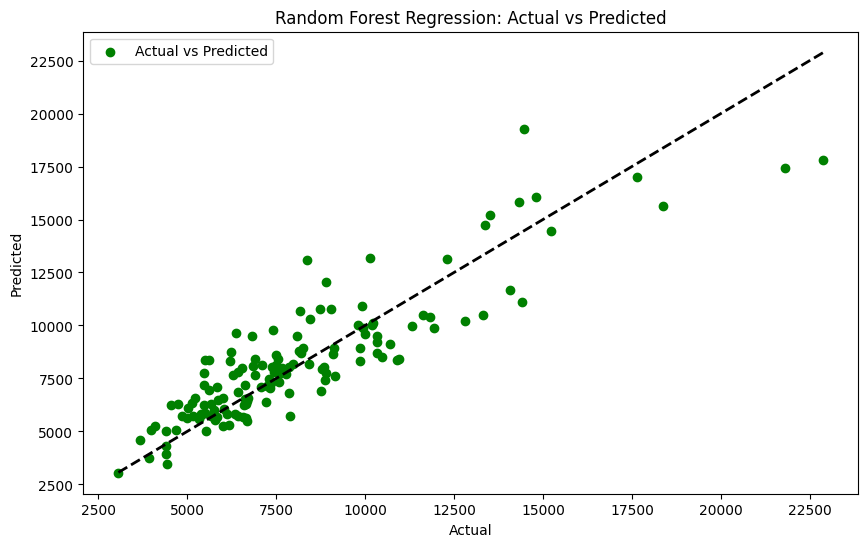

In [33]:
'''Random Forest'''
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# # 1. Load data
# data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')
# 
# # 2. Check for missing values and handle them
# if data.isnull().values.any():
#     print("Missing values in each column:\n", data.isnull().sum())
#     data.fillna(data.median(), inplace=True)  # Filling missing values with median
# 
# # 3. Separate features and the target variable
# X = data.drop('Salary', axis=1)
# y = data['Salary']
# 
# # 4. Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. (Optional) Standardize features
# For Random Forest, feature scaling is not usually necessary, but can be done if desired.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the model using Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees
rf_model.fit(X_train_scaled, y_train)

# 7. Evaluate the Random Forest regression model
rf_y_pred = rf_model.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_y_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')

rf_rmse = np.sqrt(rf_mse)
print(f'Random Forest Root Mean Squared Error: {rf_rmse}')

rf_mae = mean_absolute_error(y_test, rf_y_pred)
print(f'Random Forest Mean Absolute Error: {rf_mae}')

# Random Forest R-squared
rf_r_squared = r2_score(y_test, rf_y_pred)
print(f'Random Forest R-squared: {rf_r_squared}')

# Plot actual vs predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, color='green', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.show()


Gradient Boosting Mean Squared Error: 2141285.2170975204
Gradient Boosting Root Mean Squared Error: 1463.3130960589126
Gradient Boosting Mean Absolute Error: 1118.8420126245492
Gradient Boosting R-squared: 0.8073027425351285


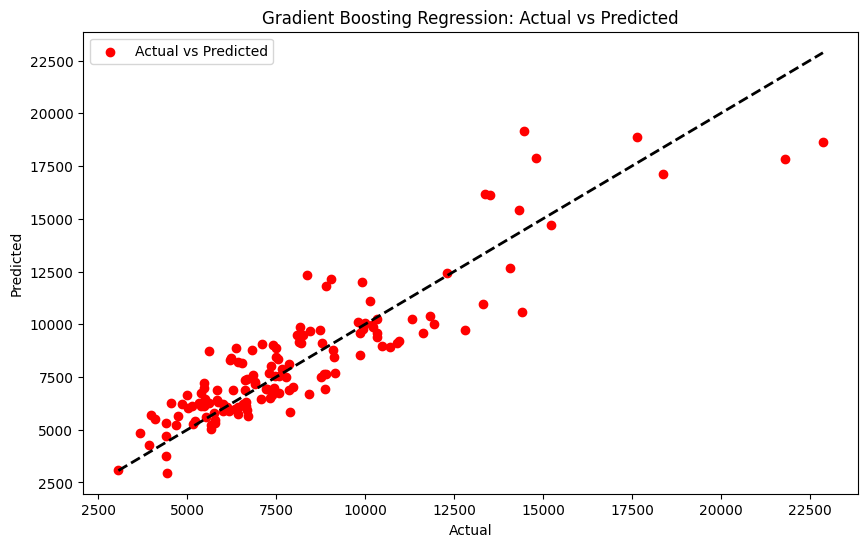

In [34]:
'''Gradient Boosting'''
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# # 1. Load data
# data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')
# 
# # 2. Check for missing values and handle them
# if data.isnull().values.any():
#     print("Missing values in each column:\n", data.isnull().sum())
#     data.fillna(data.median(), inplace=True)  # Filling missing values with median
# 
# # 3. Separate features and the target variable
# X = data.drop('Salary', axis=1)
# y = data['Salary']
# 
# # 4. Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. (Optional) Standardize features
# Gradient Boosting does not require feature scaling but can be included if testing other models.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the model using Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# 7. Evaluate the Gradient Boosting regression model
gb_y_pred = gb_model.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_y_pred)
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')

gb_rmse = np.sqrt(gb_mse)
print(f'Gradient Boosting Root Mean Squared Error: {gb_rmse}')

gb_mae = mean_absolute_error(y_test, gb_y_pred)
print(f'Gradient Boosting Mean Absolute Error: {gb_mae}')

# Gradient Boosting R-squared
gb_r_squared = r2_score(y_test, gb_y_pred)
print(f'Gradient Boosting R-squared: {gb_r_squared}')

# Plot actual vs predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, color='red', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regression: Actual vs Predicted')
plt.legend()
plt.show()


Naive Bayesian Mean Squared Error: 8286826.194278216
Naive Bayesian Root Mean Squared Error: 2878.684802870612
Naive Bayesian Mean Absolute Error: 2085.5585210282115
Naive Bayesian R-squared: 0.25425689769157667


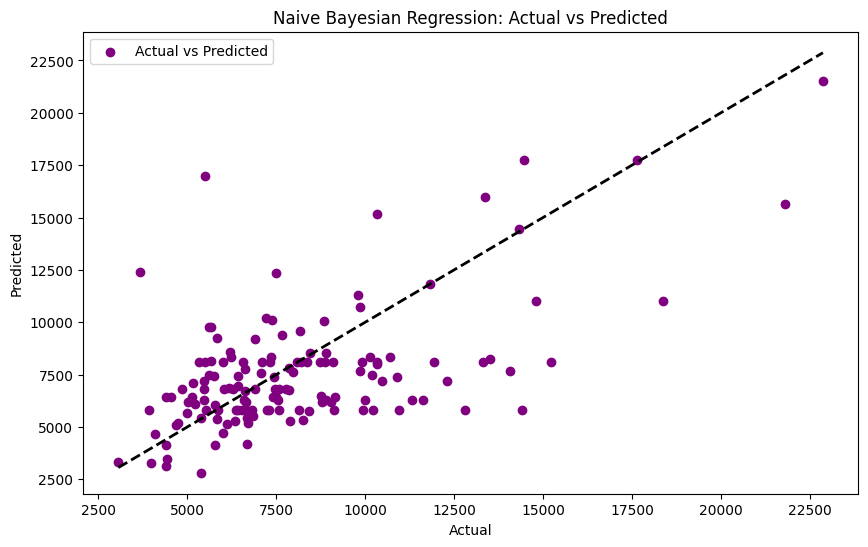

In [35]:
'''Naïve Bayesian'''
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error

# # 1. Load data
# data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')
# 
# # 2. Check for missing values and handle them
# if data.isnull().values.any():
#     print("Missing values in each column:\n", data.isnull().sum())
#     data.fillna(data.median(), inplace=True)  # Filling missing values with median
# 
# # 3. Separate features and the target variable
# X = data.drop('Salary', axis=1)
# y = data['Salary']
# 
# # 4. Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize features
# Standardization is not necessary for Gaussian Naive Bayes but doing so won't harm
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train the model using Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# 7. Evaluate the Naive Bayesian regression model
# Because Naive Bayes is typically for classification, adapt it for regression by predicting probabilities
predicted_probabilities = nb_model.predict_proba(X_test_scaled)
# Estimate salary using weighted average of class labels
predicted_salary = (predicted_probabilities * nb_model.classes_).sum(axis=1)

nb_mse = mean_squared_error(y_test, predicted_salary)
print(f'Naive Bayesian Mean Squared Error: {nb_mse}')

nb_rmse = np.sqrt(nb_mse)
print(f'Naive Bayesian Root Mean Squared Error: {nb_rmse}')

nb_mae = mean_absolute_error(y_test, predicted_salary)
print(f'Naive Bayesian Mean Absolute Error: {nb_mae}')

nb_r_squared = r2_score(y_test, predicted_salary)
print(f'Naive Bayesian R-squared: {nb_r_squared}')

# Plot actual vs predicted for Naive Bayesian
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_salary, color='purple', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Naive Bayesian Regression: Actual vs Predicted')
plt.legend()
plt.show()

Decision Tree Mean Squared Error: 3855613.9634445794
Decision Tree Root Mean Squared Error: 1963.5717362613925
Decision Tree Mean Absolute Error: 1467.1497959183675
Decision Tree R-squared: 0.6530278962061331


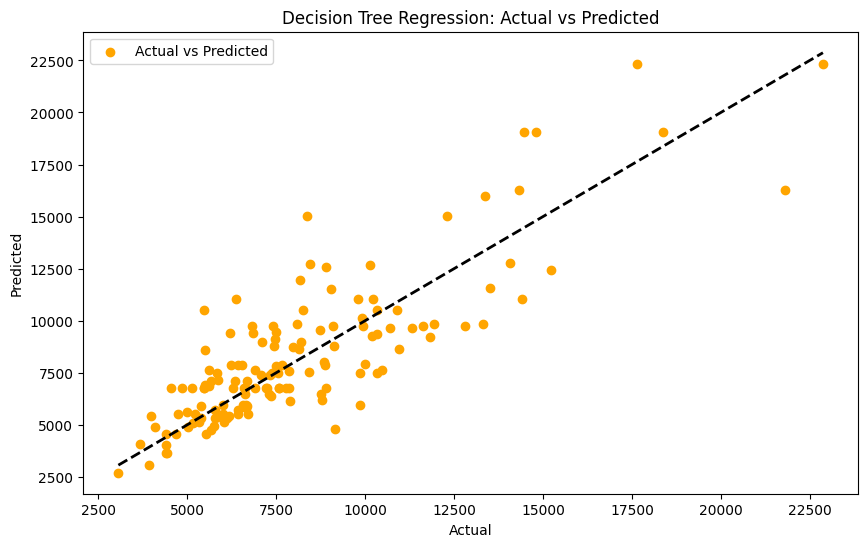

In [36]:
'''Decision Tree'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Load data
data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')

# 2. Check for missing values and handle them
if data.isnull().values.any():
    print("Missing values in each column:\n", data.isnull().sum())
    data.fillna(data.median(), inplace=True)  # Filling missing values with median

# 3. Separate features and the target variable
X = data.drop('Salary', axis=1)
y = data['Salary']

# 4. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the model using Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=2)
dt_model.fit(X_train, y_train)

# 6. Evaluate the Decision Tree regression model
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
print(f'Decision Tree Mean Squared Error: {dt_mse}')

dt_rmse = np.sqrt(dt_mse)
print(f'Decision Tree Root Mean Squared Error: {dt_rmse}')

dt_mae = mean_absolute_error(y_test, dt_y_pred)
print(f'Decision Tree Mean Absolute Error: {dt_mae}')

dt_r_squared = r2_score(y_test, dt_y_pred)
print(f'Decision Tree R-squared: {dt_r_squared}')

# Plot actual vs predicted for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, color='orange', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.legend()
plt.show()


[0]	train-rmse:3292.98016	test-rmse:3142.86736
[1]	train-rmse:3076.93695	test-rmse:2912.45118
[2]	train-rmse:2881.85750	test-rmse:2747.27324
[3]	train-rmse:2744.06991	test-rmse:2647.44872
[4]	train-rmse:2596.56154	test-rmse:2538.20886
[5]	train-rmse:2466.86494	test-rmse:2469.68009
[6]	train-rmse:2319.28837	test-rmse:2356.81888
[7]	train-rmse:2180.54495	test-rmse:2238.03721
[8]	train-rmse:2045.13439	test-rmse:2127.48529
[9]	train-rmse:1931.93534	test-rmse:2033.98773
[10]	train-rmse:1850.07573	test-rmse:1985.96774
[11]	train-rmse:1765.02628	test-rmse:1926.94812
[12]	train-rmse:1673.18374	test-rmse:1887.95042
[13]	train-rmse:1594.89613	test-rmse:1851.99019
[14]	train-rmse:1522.73060	test-rmse:1813.02521
[15]	train-rmse:1456.31022	test-rmse:1777.91109
[16]	train-rmse:1404.46352	test-rmse:1752.01731
[17]	train-rmse:1351.10872	test-rmse:1711.11085
[18]	train-rmse:1293.46468	test-rmse:1692.64387
[19]	train-rmse:1243.55896	test-rmse:1669.06113
[20]	train-rmse:1204.84087	test-rmse:1649.36930
[2

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


XGBoost Mean Squared Error: 2502662.4075550865
XGBoost Root Mean Squared Error: 1581.9805332415083
XGBoost Mean Absolute Error: 1138.8451119559152
XGBoost R-squared: 0.7747819027350366


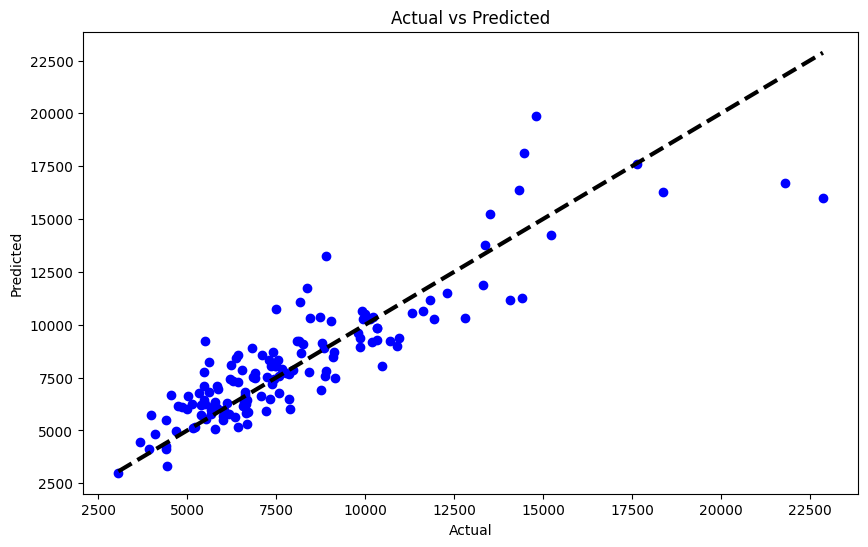

In [37]:
'''xgboost'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and prepare data
data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')
data.ffill(inplace=True)  # Fill missing values forward

# Assuming 'Salary' is the target and the rest are features
X = data.drop('Salary', axis=1)
y = data['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'learning_rate': 0.1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'verbosity': 1  # Sets the verbosity of the model training process
}

# Train the model
num_round = 1000
bst = xgb.train(params, dtrain, num_round, [(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=50)

# Predict on test set
y_pred_xgb = bst.predict(dtest)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {xgb_mse}')

xgb_rmse = np.sqrt(xgb_mse)
print(f'XGBoost Root Mean Squared Error: {xgb_rmse}')

xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
print(f'XGBoost Mean Absolute Error: {xgb_mae}')

xgb_r2 = r2_score(y_test, y_pred_xgb)
print(f'XGBoost R-squared: {xgb_r2}')


import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [ ]:
'''GRU'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load and prepare data
data = pd.read_csv('/Users/a1234/Desktop/workspace/Employment_Analysis_and_Recommendation_System_Based_on_NLP_and_Data_Modeling/data/processed_wage_sample_data.csv')
data.ffill(inplace=True)  # Fill missing values forward

# Assuming 'Salary' is the target and the rest are features
X = data.drop('Salary', axis=1).values
y = data['Salary'].values

# Reshape input data to be [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], X_train.shape[2]))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], X_test.shape[2]))
X_train_scaled = X_train_scaled.reshape(X_train.shape)
X_test_scaled = X_test_scaled.reshape(X_test.shape)

# 4. Build GRU model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    GRU(30),  # Using a GRU layer with 30 units
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')

# 5. Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_scaled, y_train, epochs=1, batch_size=128,  # Adjusted batch size
                    validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=2)

# 6. Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = np.mean((y_test - y_pred.squeeze())**2)
print(f'Mean Squared Error: {mse}')

# 7. Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 8. Plot predicted vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual Salary')
plt.plot(y_pred, label='Predicted Salary', alpha=0.7)
plt.title('Salary Prediction Comparison')
plt.ylabel('Salary')
plt.xlabel('Data Point Index')
plt.legend()
plt.show()


In [41]:
from tabulate import tabulate

# Create a DataFrame with evaluation results
data = {
    "Model": ["Support Vector Regression (SVM)", "Random Forest Regression", "Gradient Boosting Regression",
              "Naive Bayesian Regression", "Decision Tree Regression", "XGBoost Regression"],
    "Mean Squared Error": [svm_mse, rf_mse, gb_mse, nb_mse, dt_mse, xgb_mse],
    "Root Mean Squared Error": [svm_rmse, rf_rmse, gb_rmse, nb_rmse, dt_rmse, xgb_rmse],
    "Mean Absolute Error": [svm_mae, rf_mae, gb_mae, nb_mae, dt_mae, xgb_mae],
    "R-squared": [svm_r_squared, rf_r_squared, gb_r_squared, nb_r_squared, dt_r_squared, xgb_r2]
}

df = pd.DataFrame(data)

# Sort the DataFrame by Mean Squared Error (ascending order)
df_sorted = df.sort_values(by="Mean Squared Error", ascending=True)

# Output the sorted table
print(tabulate(df_sorted, headers='keys', tablefmt='github', showindex=False))


| Model                           |   Mean Squared Error |   Root Mean Squared Error |   Mean Absolute Error |   R-squared |
|---------------------------------|----------------------|---------------------------|-----------------------|-------------|
| Gradient Boosting Regression    |          2.14129e+06 |                   1463.31 |               1118.84 |    0.807303 |
| Random Forest Regression        |          2.39675e+06 |                   1548.14 |               1158.23 |    0.784313 |
| XGBoost Regression              |          2.50266e+06 |                   1581.98 |               1138.85 |    0.774782 |
| Decision Tree Regression        |          3.85561e+06 |                   1963.57 |               1467.15 |    0.653028 |
| Naive Bayesian Regression       |          8.28683e+06 |                   2878.68 |               2085.56 |    0.254257 |
| Support Vector Regression (SVM) |          9.3496e+06  |                   3057.71 |               2140.58 |    0.158616 |
